<a href="https://colab.research.google.com/github/berryaesi/CSEL-302-Introduction-to-Intelligent-System/blob/main/2B_TORRES_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [ ]:
data_path = ('diabetes.csv')
dataSet = pd.read_csv(data_path)

# **2. Dataset Preparation**

• ***Description:*** Briefly describe the dataset used for the case study, including the source, variables
(both dependent and independent), and any preprocessing steps (e.g., cleaning, normalization)
performed to prepare the data for analysis.

**Diabetes Dataset**

• ***Description:*** Comprises diagnostic measurements for a set of patients diagnosed with diabetes.

• ***Use Case:*** Suitable for both Linear Regression (predicting a quantitative measure of disease
progression) and Logistic Regression (classifying patients into categories based on diagnostic
measurements).

• Link: https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

**Variable:**

**Dependent Variable:** Outcome

**Independent Variable:** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataSet.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Check for missing values
print("Missing values in the dataset:")
print(dataSet.isnull().sum())

Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
dataSet[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(dataSet[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [ ]:
# Scale the features
scaler = StandardScaler()
dataSet[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(dataSet[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [ ]:
# Split the dataset into train and test sets
X = dataSet.drop('Outcome', axis=1)
y = dataSet['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shape of train and test sets
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of train set: (614, 8) (614,)
Shape of test set: (154, 8) (154,)


# **3. Exploratory Data Analysis (EDA)**

• ***Probability and Statistics Concepts:*** Utilize descriptive statistics to summarize the dataset,
showcasing measures such as mean, median, variance, and standard deviation. Employ probability
distributions to understand the data's distribution.

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(dataSet.describe())

Summary Statistics:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17   1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01   1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   4.921866e+00  6.652839e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.590520e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.000652e+00         

• ***Visualization:*** Create visualizations (histograms, scatter plots) to explore relationships between
variables and identify patterns or outliers.

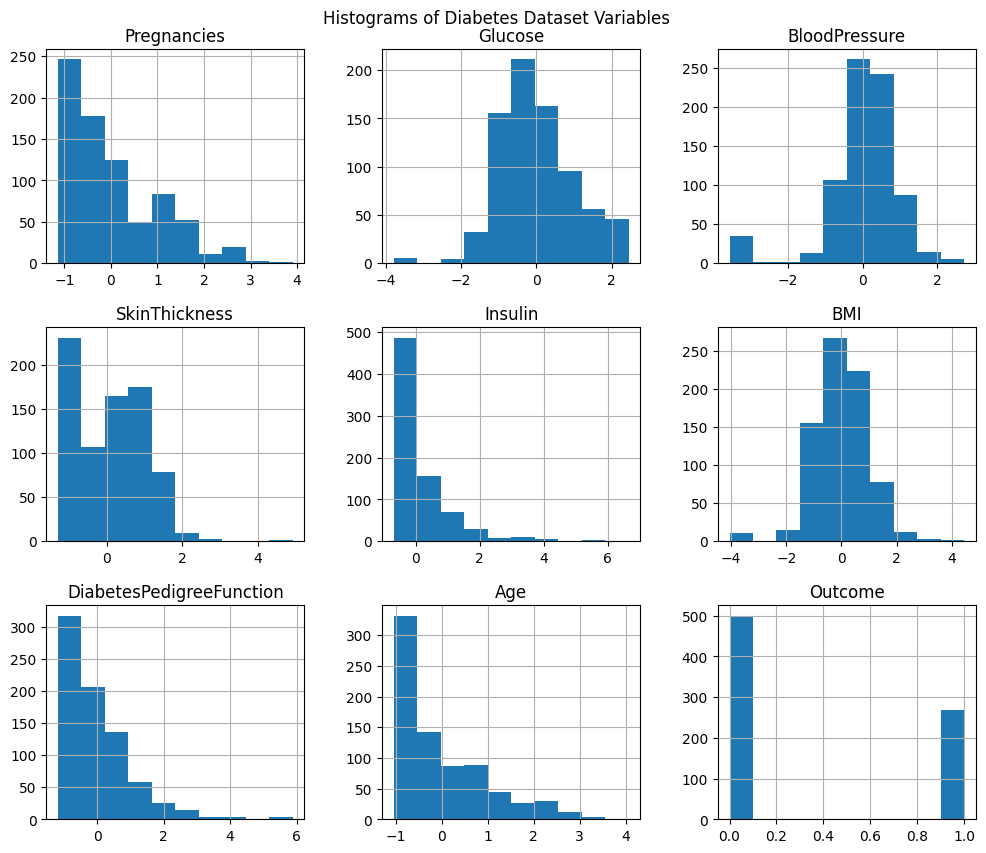

In [ ]:
# Histograms
dataSet.hist(figsize=(12, 10))
plt.suptitle('Histograms of Diabetes Dataset Variables', y=0.92)
plt.show()

<Figure size 1500x1000 with 0 Axes>

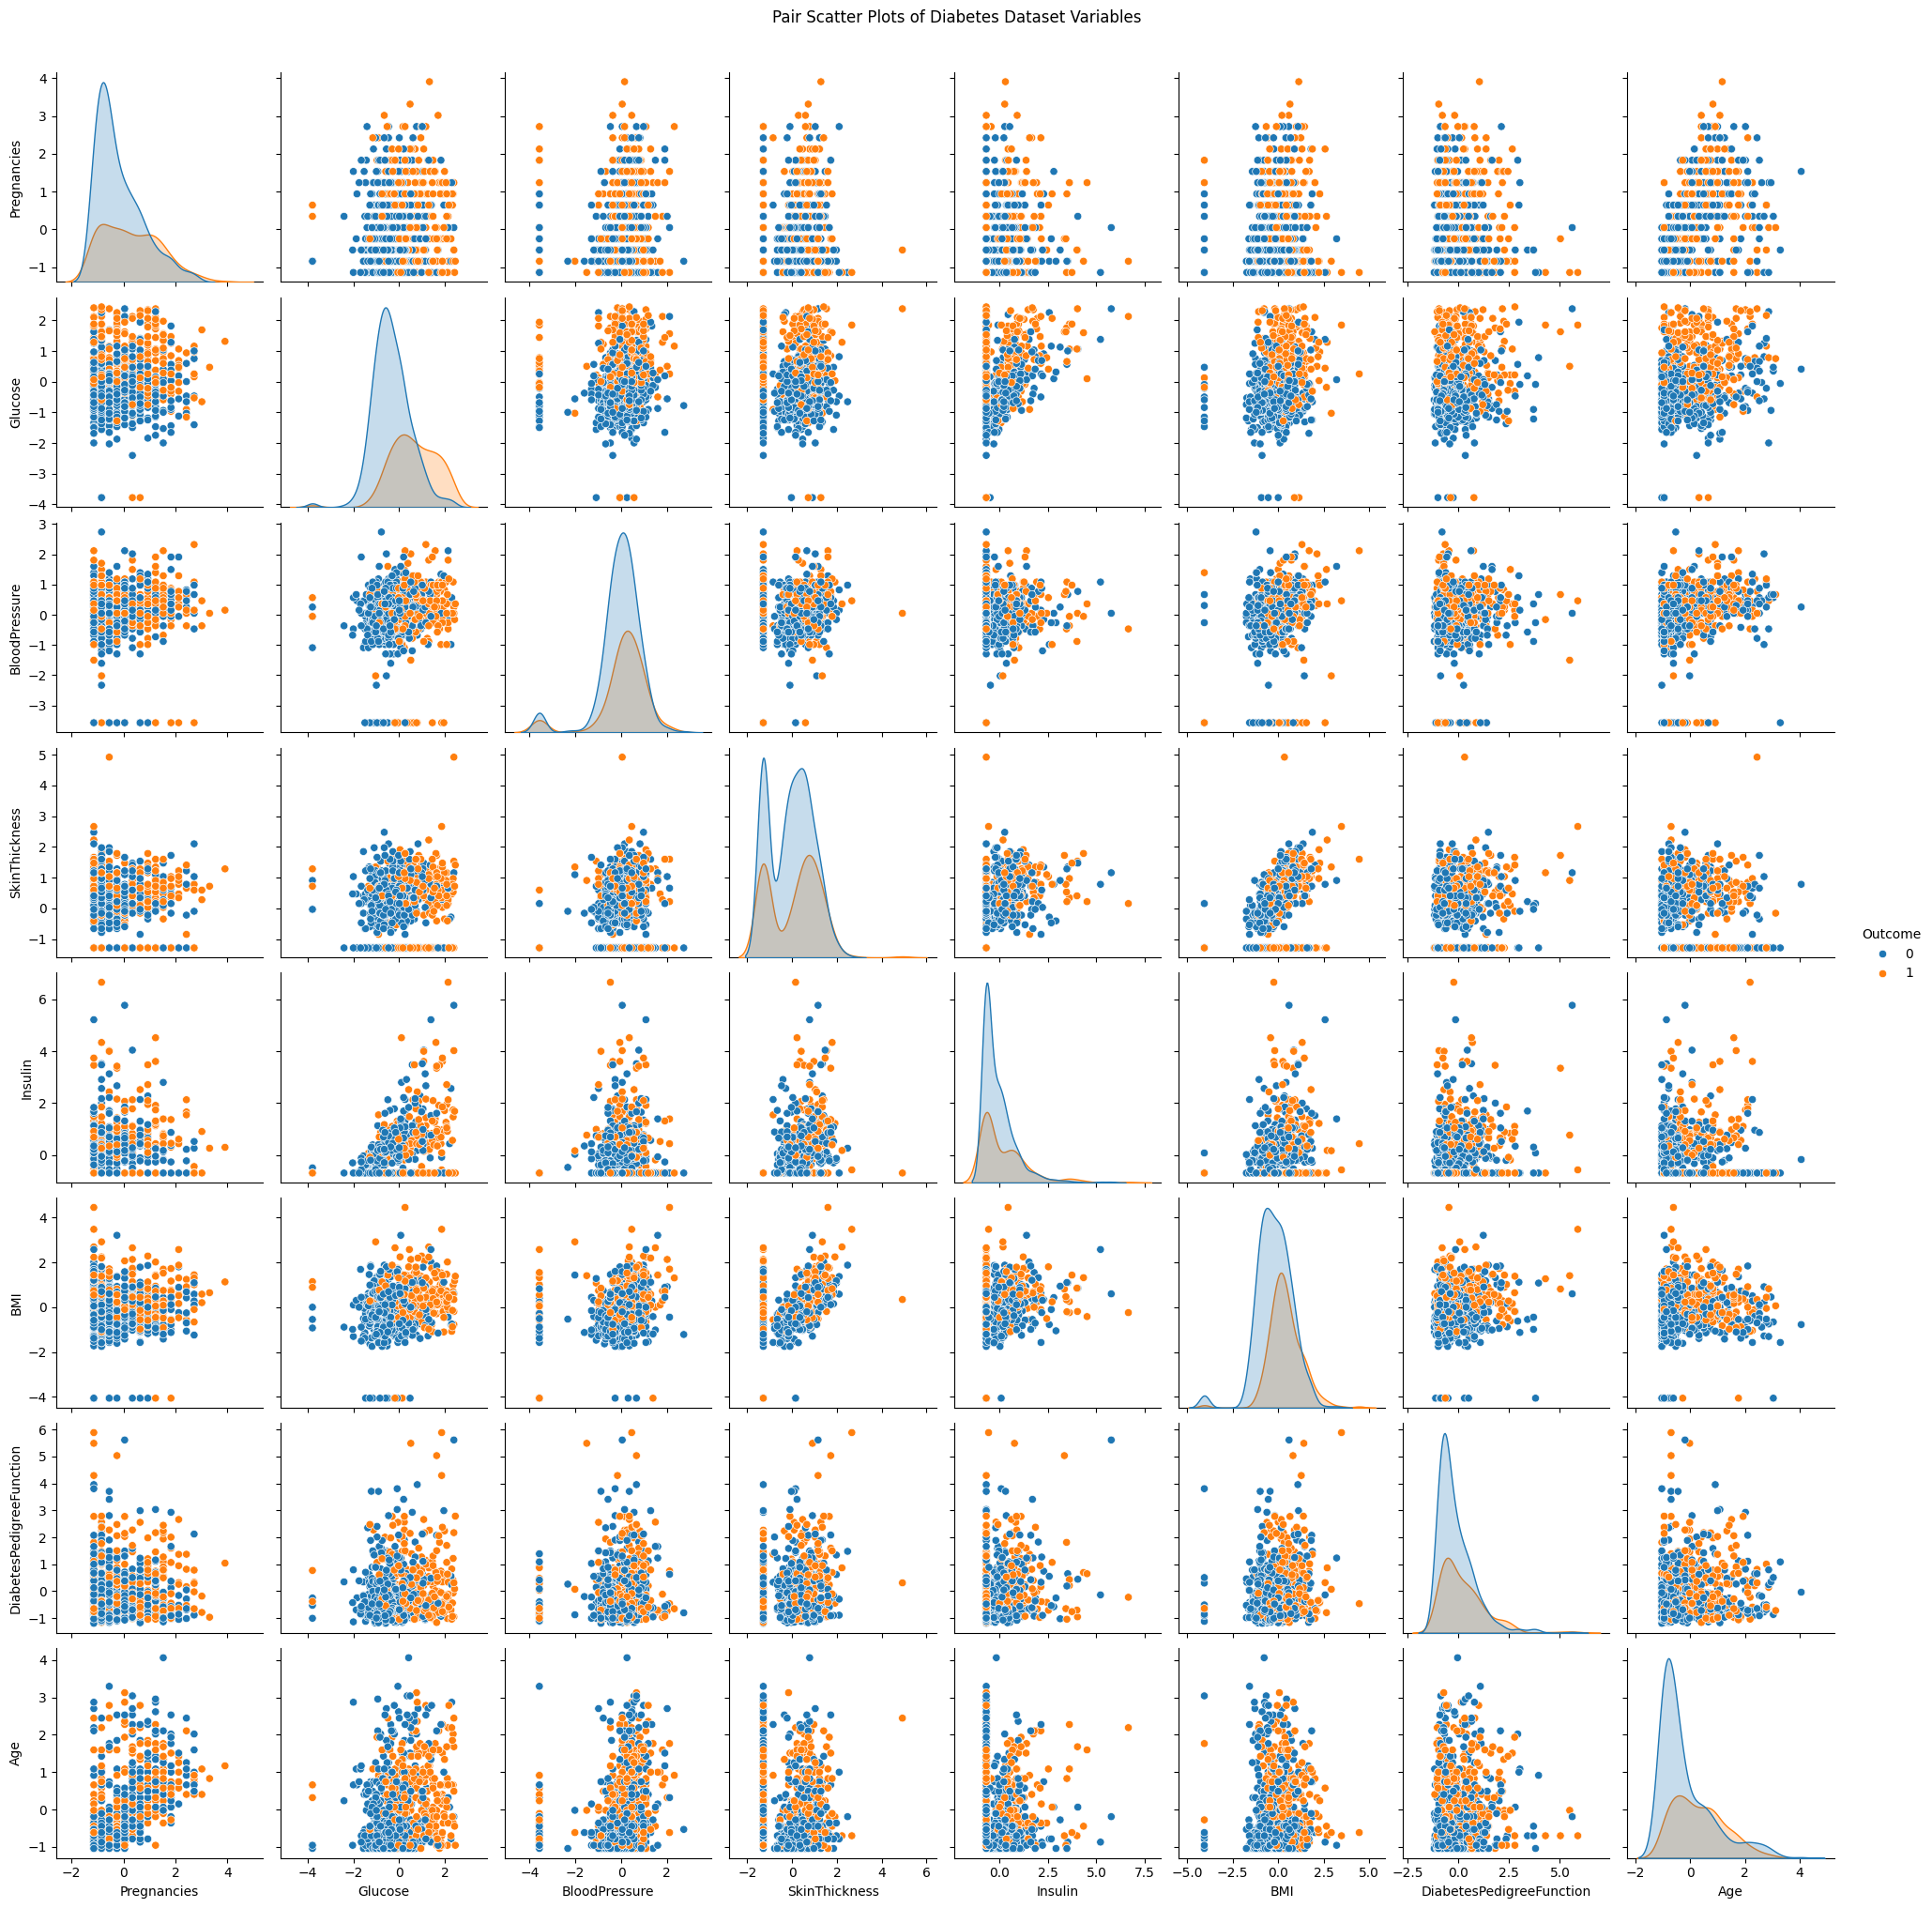

In [ ]:
# Scatter Plot of all pairs of variables
plt.figure(figsize=(15, 10))
sns.pairplot(dataSet, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Scatter Plots of Diabetes Dataset Variables', y=1.02)
plt.show()

# **4. Linear Regression Model**

***• Theory Recap:*** Highlight key concepts from the Linear Regression lecture, emphasizing the model's
assumptions and the importance of variable relationships.

Linear regression is about understanding the relationship between the variables (dependent and independent). What is their relationship, and how can this variable affect that variable? Again, it is used to understand the relationship between variables.


Above is the model and also the given variables.

Independent variables are variables that are the basis for the dependent variable, and the dependent variable depends on the independent variable or is based on it. It is like a cause-and-effect relationship where the independent variable is the cause and the dependent variable is the effect, or where the effect goes.

• ***Implementation:*** Demonstrate the process of fitting a Linear Regression model using Python in
Google Colab, including selecting independent variables and interpreting the model's coefficients.

I chose three independent variables that have the best relationship with the dependent variable. Since we are talking about diabetes, I chose glucose, BMI, and age.

In [ ]:
# Selecting independent variables
X_train_lin = X_train[['Glucose', 'BMI', 'Age']]

In [ ]:
# Fitting the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train)

LinearRegression()

In [ ]:
# Interpreting model coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: 0.3497679766240558
Coefficients: [0.17065737 0.11241407 0.088762  ]


In [ ]:
# Making predictions on test set
X_test_lin = X_test[['Glucose', 'BMI', 'Age']]
y_pred_lin = lin_reg.predict(X_test_lin)

• ***Evaluation:*** Use metrics like R-squared, MSE (Mean Squared Error), and RMSE (Root Mean
Squared Error) to evaluate model performance.

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lin)

print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Evaluation Metrics:
Mean Squared Error (MSE): 0.18578147442861784
Root Mean Squared Error (RMSE): 0.4310237515829236
R-squared (R2): 0.19081846693313098


# **5. Logistic Regression Model**

• ***Theory Recap:*** Reiterate the foundational concepts of Logistic Regression, focusing on its
application in binary classification problems.







Logistic regression uses mathematics to find the relationships between two points. use for predicting the outcome of one dependent variable based on one or more independent variables. It is binary; it has only two options: yes/no, right/wrong, pass/fail.

Let's have the logical function, or sigmund function, for example. In this function, any value that is between 1 and 0 is a probability. Probability between only two points.

In any case, logistic regression is used to get the probability of a function using some math, which may not be totally accurate but is closer to the possible outcome.

We have three types of logistic regression.
1. Binary logistic regression: binary logistic regression is applied when the dependent variable is binary or dichotomous.
2. Multinomial logistic regression is applied when the dependent variable includes more than two categories but no ordered subcategories.
3. Ordinal logistic regression is applied when the dependent variable includes more than two categories and there is a natural ordering between the categories.

In our case, we used binary logistic regression as our dependent variable is binary or has only two classes.

• ***Implementation:*** Show the steps to build a Logistic Regression model, detailing feature selection,
model fitting, and coefficient interpretation.

In [ ]:
# Feature selection
X_train_log = X_train[['Glucose', 'BMI', 'Age']]

In [ ]:
# Fitting the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train)

LogisticRegression()

In [ ]:
# Interpreting model coefficients
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)

Intercept: [-0.85925855]
Coefficients: [[0.97590785 0.734422   0.50735185]]


In [ ]:
# Making predictions on test set
X_test_log = X_test[['Glucose', 'BMI', 'Age']]
y_pred_log = log_reg.predict(X_test_log)

• ***Evaluation:*** Discuss model evaluation techniques specific to classification problems, such as
Accuracy, Precision, Recall, F1 Score, ROC Curve, and AUC (Area Under the Curve).

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model Evaluation:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364
F1 Score: 0.6422018348623852


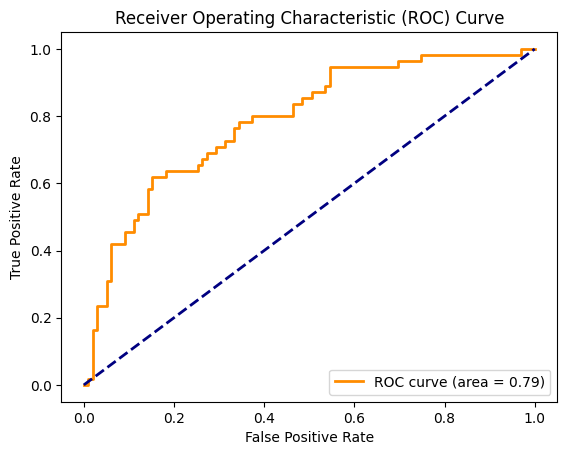

In [ ]:
# ROC curve and AUC
y_pred_prob = log_reg.predict_proba(X_test_log)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **6. Model Comparison and Selection**

• Compare the Linear and Logistic Regression models based on their performance metrics,
discussing each model's suitability for different types of prediction problems.

In [ ]:
# Linear Regression evaluation metrics
print("Linear Regression Evaluation Metrics:")
print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Logistic Regression evaluation metrics
print("\nLogistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Linear Regression Evaluation Metrics:
R-squared (R2): 0.19081846693313098
Mean Squared Error (MSE): 0.18578147442861784
Root Mean Squared Error (RMSE): 0.4310237515829236

Logistic Regression Evaluation Metrics:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364
F1 Score: 0.6422018348623852
ROC AUC: 0.7869605142332415


• Explain the decision-making process for choosing one model over the other, considering factors
like model accuracy, interpretability, and assumptions.

We have here the results using different functions with one dataset.


From the given dataset, we have the chosen dependent variable that has only two types of values, which are 1 and 0, so I think logistic regression suited this the most, but that is only because I chose the outcome as my dependent variable. Logistic regression is best used when the dependent variable is categorical with only two classes, while linear regression is best used when the dependent variable is continuous and follows a linear pattern.


From our dataset about diabetes, which has 8 independent variables and 1 dependent variable, I chose the logistic regression model. As I explained above, my chosen outcome focuses only on two classes, which is why it is best used with logistic regression.


Given the result above for the linear regression, it shows that it has limited predictive power and accuracy in explaining the variability in the dependent variable, as I said, because the chosen dependent variable is not linear. It has a low R-squared value and a high RMSE. On the other hand, the logistic regression model result has moderate accuracy, precision, recall, and F1 score, indicating reasonable performance in binary classification, which means that this model is best suited to my chosen variables.

# **7. Conclusion and Insights**

• Summarize the key findings from the case study, highlighting how the applied statistical and
machine learning methods facilitated data-driven decision-making.

For our diabetes dataset with independent variables: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes degree function, and age, and dependent variable: outcome, we found that the logistic regression model outperformed the linear regression model in terms of classification accuracy, precision, recall, F1 score, and ROC AUC as the dependent variable chosen is binary type, which has only two classes.


As you can see, variables are important here. We use this to get the relationship and desired outcome. The chosen features that are used for the model seem to be important predictors because they are the ones that can best describe why the outcome is like that.


Using the applied statistical and machine learning methods makes it easy for us to predict an outcome without sweating. It makes it easier for us, as it only needs a few types to get the prediction that we need. It also shows us graphs aligned with its predictions.

• Discuss potential applications of these models in various fields, as outlined in the lectures, and
reflect on the importance of understanding underlying assumptions and model limitations.

These models can be used in many fields, and they can help many professionals. A linear regression model can be used in the medical field, education, economics, and marketing. Then logistic regression can also be used in healthcare, finance, marketing, etc.


Linear regression is about looking for cause and effect, and with that, we can fully understand how things happen. For example, when applying linear regression to education, let us identify the independent and dependent variables, or cause and effect. For the dependent, we have student grades, and for the independent, we have teaching technique, study hours, and exam scores. With the given variable, we can clearly see that the effect is about student grades, and what causes this is the teaching technique, study hours, and exam scores. Applying it to the linear regression model, we can immediately see how these variables affect each other and can give us an answer.


Similar to the logistic regression but a little different, as we only predict here and we have all the possibilities. Since it is applicable to healthcare, finance, and marketing, let's take healthcare as an example. So here on Logistic, we need to predict and have the possibilities aligned. We can predict the patient's disease, or most likely the patient's disease, based on the given medical history or family medical background. Although similar to linear regression, this logistic regression only has two classes, and when getting the outcome, the prediction is where the highest possibility will go. For example, based on the patient's medical record, the patient is most likely to have diabetes, so the prediction is that the patient has diabetes. The thing is, logistic regression has a high possibility of a of a prediction that is most likely accurate.

# **8. References**

Dhakad, S. (2022, February 25). Diabetes Dataset for Beginners. Kaggle. https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

indeed. (2022). Linear Regression: Definition, Applications and Benefits. Retrieved from https://sg.indeed.com/career-advice/career-development/linear-regression

Shah, D. (2023, March 31). Logistic Regression: Definition, Use Cases, Implementation. v7labs. https://www.v7labs.com/blog/logistic-regression#h3


Libraries used:
numpy
pandas
matplotlib
seaborn
scikit-learn